# 2D Ising model: Exact solution

References:
* B. Kaufman, Phys. Rev. 76, 1232 (1949).
* A. E. Ferdinand and M. P. A. Fisher, Phys. Rev. 185, 832 (1969).
* Statistical Mechanics, Third Edition by R K Pathria and Paul D. Beale. (Ch 13.4)

In [1]:
import numpy as np
import pyuni10 as uni10
import matplotlib.pyplot as plt

In [2]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))
Kc = np.log(1+np.sqrt(2))/2

### $c$-functions

The parameter $\gamma_r, r=0, \cdots 2n-1$ are given by following relations:

$$
  \cosh(\gamma_r)=\cosh(2K)\coth(2K) - \cos(\frac{r \pi}{n}) =\frac{\cosh(2K)^2}{\sinh(2K)} - \cos(\frac{r \pi}{n}) 
  \rightarrow e^{\gamma_0} = e^{2K}\tanh(K).
$$

So that
$$
  \gamma_0 = 2K + \ln(\tanh(K)), \; \gamma_r  =\text{arccosh}(c_r) = \ln[c_r + (c^2_r-1)^{1/2}],
$$
where
$$
  c_r =\cosh(2K)\coth(2K) - \cos(\frac{r \pi}{n}) = \frac{\cosh(2K)^2}{\sinh(2K)} - \cos(\frac{r \pi}{n})
  = \sinh(2K) + \frac{1}{\sinh(2K)} - \cos(\frac{r \pi}{n}).
$$

In [3]:
# c_0, c_r and its derivatives
def c_0(K):
    return np.sinh(2*K) + 1/np.sinh(2*K) - 1

def eval_c(n, K):
    c = np.zeros((2*n, K.size))
    for r in range(2*n):
        c[r, :] = np.sinh(2*K) + 1/np.sinh(2*K) - np.cos(np.pi*r/n)
    return c

def eval_d_c(K):
    return 2*np.cosh(2*K)*(1-1/(np.sinh(2*K)**2))

def eval_dd_c(K):
    return 8*(np.cosh(2*K)**2)/(np.sinh(2*K)**3) + 4*(np.sinh(2*K) - 1/np.sinh(2*K))

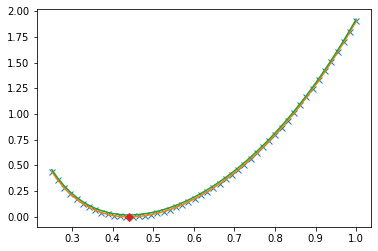

In [4]:
K = np.linspace(1/4, 1/1)
n = 16
c = eval_c(n, K)

fig, ax = plt.subplots()

ax.plot(K, c_0(K)-1,'x')
ax.plot(K, c[0,:]-1)
ax.plot(K, c[1,:]-1)
ax.plot(Kc, 0, 'D')

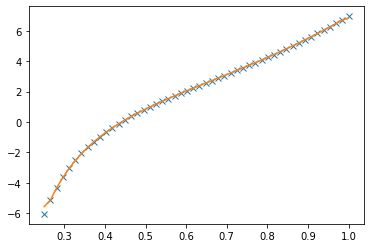

In [5]:
K = np.linspace(1/4, 1/1)
n = 16
c = eval_c(n, K)
d_c = eval_d_c(K)

fig, ax = plt.subplots()

ax.plot(K, d_c[:], 'x')
ax.plot(K, np.gradient(c[0,:],K))


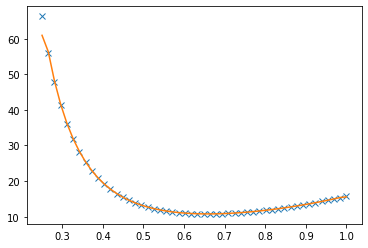

In [6]:
K = np.linspace(1/4, 1/1)
n = 16
dc = eval_d_c(K)
dd_c = eval_dd_c(K)

fig, ax = plt.subplots()

ax.plot(K, dd_c[:], 'x')
ax.plot(K, np.gradient(d_c[:],K))

### $\gamma$-functions

In [7]:
def eval_gamma(n, K):
    c = eval_c(n, K)
    gamma = np.zeros((2*n, K.size))

    gamma[0, :] = 2*K + np.log(np.tanh(K))
    gamma[1:, :] = np.arccosh(c[1:, :])
    return gamma

def eval_d_gamma(n, K):
    c = eval_c(n, K)
    d_c = eval_d_c(K)

    d_gamma = np.zeros((2*n, K.size))
    d_gamma[0, :] = 2*(1.0 + 1.0/np.sinh(2*K))
    d_gamma[1:, :] = d_c[:]*(c[1:,:]**2-1)**(-1/2)

    return d_gamma

def eval_dd_gamma(n, K):
    c = eval_c(n, K)
    d_c = eval_d_c(K)
    dd_c = eval_dd_c(K)

    dd_gamma = np.zeros((2*n, K.size))  
    dd_gamma[0, :] = -4*np.cosh(2*K)/(np.sinh(2*K)**2)
    dd_gamma[1:, :] = dd_c[:] * (c[1:, :]**2-1)**(-1/2) - c[1:,:]*(d_c[:]**2) * (c[1:,:]**2-1)**(-3/2)
    return dd_gamma

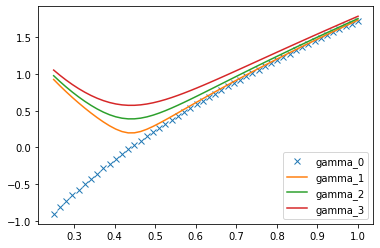

In [49]:
K = np.linspace(1/4, 1/1)
n = 16

gamma = eval_gamma(n, K)

fig, ax = plt.subplots()

ax.plot(K, gamma[0,:],'x', label='gamma_0')
# ax.plot(K, np.sinh(gamma[0,:]))
# ax.plot(K, np.cosh(2*K)-1/np.tanh(2*K))
ax.plot(K, gamma[1,:], label='gamma_1')
ax.plot(K, gamma[2,:], label='gamma_2')
ax.plot(K, gamma[3,:], label='gamma_3')
ax.legend()

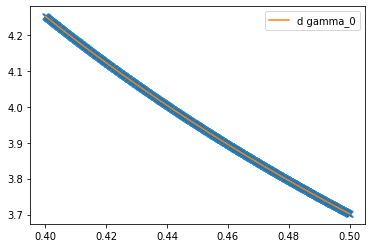

In [46]:
K = np.linspace(0.4, 0.5, 1000)
n = 1024

gamma = eval_gamma(n, K)
d_gamma = eval_d_gamma(n, K)
fig, ax = plt.subplots()

ax.plot(K, d_gamma[0, :], 'x')
ax.plot(K, np.gradient(gamma[0,:],K), label='d gamma_0')

# ax.plot(K, d_gamma[1, :], 'x')
# ax.plot(K, np.gradient(gamma[1,:],K), label='gamma_1')

# ax.plot(K, d_gamma[2, :], 'x')
# ax.plot(K, np.gradient(gamma[2,:],K), label='gamma_2')

# ax.plot(K, d_gamma[3, :], 'x')
# ax.plot(K, np.gradient(gamma[3,:],K), label='gamma_3')

ax.legend()

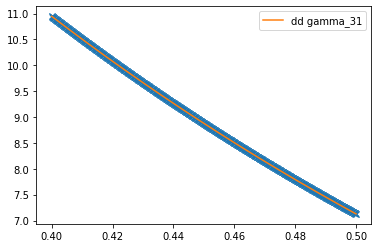

In [53]:
K = np.linspace(0.4, 0.5, 1000)
n = 1024

d_gamma = eval_d_gamma(n, K)
dd_gamma = eval_dd_gamma(n, K)

fig, ax = plt.subplots()

# ax.plot(K, dd_gamma[0, :], 'x')
# ax.plot(K, np.gradient(d_gamma[0,:],K), label='dd gamma_0')

# ax.plot(K, d_gamma[1, :])
# ax.plot(K, dd_gamma[1, :], 'x')
# ax.plot(K, np.gradient(d_gamma[1,:],K), label='dd gamma_1')

# ax.plot(K, dd_gamma[2, :], 'x')
# ax.plot(K, np.gradient(d_gamma[2,:],K), label='dd gamma_2')

ax.plot(K, dd_gamma[512, :], 'x')
ax.plot(K, np.gradient(d_gamma[512,:],K), label='dd gamma_31')


ax.legend()

### Z1, Z2, Z3, Z4

In [11]:
def eval_Z1(m, gamma, K):
    return np.prod(2*np.cosh(m*gamma[1::2,:]/2), axis=0)

def eval_Z2(m, gamma, K):
    return np.prod(2*np.sinh(m*gamma[1::2,:]/2), axis=0)

def eval_Z3(m, gamma, K):
    return np.prod(2*np.cosh(m*gamma[0::2,:]/2), axis=0)

def eval_Z4(m, gamma, K):
    return np.prod(2*np.sinh(m*gamma[0::2,:]/2), axis=0)

[ 52.31237835  40.98302243  32.8394343   26.8003232   22.19782527
  18.6041476   15.73644428  13.40242367  11.46809773   9.83803577
   8.44292301   7.23151785   6.165331     5.21503069   4.35796741
   3.5764396    2.85645896   2.18685845   1.55863923   0.96448632
   0.39840539  -0.14455262  -0.66850249  -1.17688772  -1.67260774
  -2.15811789  -2.63550865  -3.10656891  -3.57283679  -4.03564075
  -4.49613308  -4.95531728  -5.41407062  -5.87316279  -6.33327142
  -6.79499506  -7.25886403  -7.7253496   -8.19487176  -8.6678058
  -9.14448794  -9.62522014 -10.11027422 -10.59989545 -11.0943056
 -11.59370561 -12.09827792 -12.6081885  -13.12358857 -13.64461624]


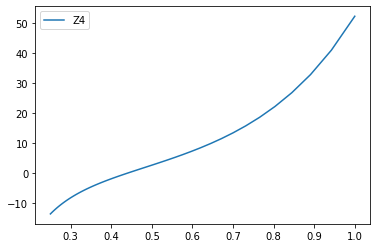

In [13]:
K = np.linspace(1/4, 1/1)
n = 3
m = 3

T = np.linspace(1,4)
K = 1/T
n = 2
m = n

gamma = eval_gamma(n, K)
gamma.shape

Z1 = eval_Z1(m,gamma,K)
Z2 = eval_Z2(m,gamma,K)
Z3 = eval_Z3(m,gamma,K)
Z4 = eval_Z4(m,gamma,K)

fig, ax = plt.subplots()

# ax.plot(K, Z1, label='Z1')
# ax.plot(K, Z2, label='Z2')
# ax.plot(K, Z3, label='Z3')
ax.plot(K, Z4, label='Z4')
print(Z4)
ax.legend()

[-668.70859558 -521.96503914 -412.10670099 -328.06065434 -262.39861594
 -210.01937965 -167.34202476 -131.79905932 -101.51043599  -75.06928317
  -51.39813971  -29.65055216   -9.14236212   10.69728545   30.36167609
   50.29327073   70.90433298   92.59340807  115.7590321   140.81166034
  168.18454412  198.34411355  231.80030975  269.11723745  310.92446461
  357.92927279  410.93015463  470.83186087  538.66231519  615.59174147
  702.95438279  802.27323552  915.28827516 1043.98871365 1190.64990233
 1357.8755808  1548.64627208 1766.37473977 2014.96955605 2298.90798237
 2623.31954052 2994.08185424 3417.93057357 3902.58546076 4456.8950231
 5091.00242888 5816.53584682 6646.82681174 7597.160751   8685.06441624]


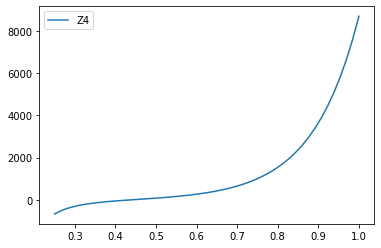

In [14]:
K = np.linspace(1/4, 1/1)
n = 3
m = 3
gamma = eval_gamma(n, K)

Z4 = eval_Z4(m,gamma,K)

fig, ax = plt.subplots()

ax.plot(K, Z4, label='Z4')
ax.legend()
print(Z4)

### Z2/Z1, Z3/Z1, Z4/Z1

In [15]:
def eval_Z2_over_Z1(m, gamma, K):
    return np.prod(np.sinh(m*gamma[1::2,:]/2)/np.cosh(m*gamma[1::2,:]/2), axis=0)

def eval_Z3_over_Z1(m, gamma, K):
    return np.prod(np.cosh(m*gamma[0::2,:]/2)/np.cosh(m*gamma[1::2,:]/2), axis=0)

def eval_Z4_over_Z1(m, gamma, K):
    return np.prod(np.sinh(m*gamma[0::2,:]/2)/np.cosh(m*gamma[1::2,:]/2), axis=0)

def All_Z_over_Z1(K, n, m, gamma):
    Z2_over_Z1 = eval_Z2_over_Z1(m, gamma, K)
    Z3_over_Z1 = eval_Z3_over_Z1(m, gamma, K)
    Z4_over_Z1 = eval_Z4_over_Z1(m, gamma, K) 
    All_Z_over_Z1 = 1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1
    return All_Z_over_Z1

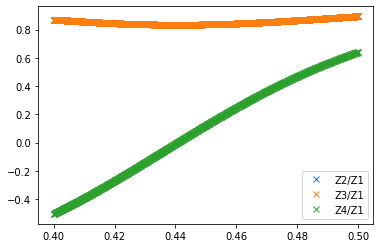

In [16]:
K = np.linspace(1/4, 1/1)
n = 7
m = 3

T = np.linspace(2,2.5, 1000)
K = 1/T
n = 8
m = n

gamma = eval_gamma(n, K)

Z1 = eval_Z1(m,gamma,K)
Z2 = eval_Z2(m,gamma,K)
Z3 = eval_Z3(m,gamma,K)
Z4 = eval_Z4(m,gamma,K)

Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)


fig, ax = plt.subplots()
ax.plot(K, Z2_over_Z1, 'x', label='Z2/Z1')
# ax.plot(K, Z2/Z1)

ax.plot(K, Z3_over_Z1, 'x', label='Z3/Z1')
# ax.plot(K, Z3/Z1)

ax.plot(K, Z4_over_Z1, 'x', label='Z4/Z1')
# ax.plot(K, Z4/Z1)

# ax.plot([Kc,Kc],[-0.75, 1])
ax.legend()

### $Z^\prime_1/Z_1$

In [17]:
def eval_dZ1_over_Z1(m, gamma, d_gamma, K):
    return np.sum(d_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2

def eval_dZ2_over_Z2(m, gamma, d_gamma, K):
    return np.sum(d_gamma[1::2,:]/np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2

def eval_dZ3_over_Z3(m, gamma, d_gamma, K):
    return np.sum(d_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2

def eval_dZ4_over_Z4(m, gamma, d_gamma, K):
    return np.sum(d_gamma[0::2,:]/np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2

In [18]:
# to be checked.....
def eval_dZ4(m, gamma, d_gamma, K):
    dZ4 = np.zeros_like(K)
    for l in range(n):
        print(l)
        X = np.prod(np.sinh(m*gamma[0:2*l:2,:]/2),axis=0)*np.prod(np.sinh(m*gamma[2*l+2::2,:]/2),axis=0)
        dZ4 = dZ4 + np.cosh(m*gamma[2*l,:]/2)*m*d_gamma[2*l,:]*X
    return dZ4

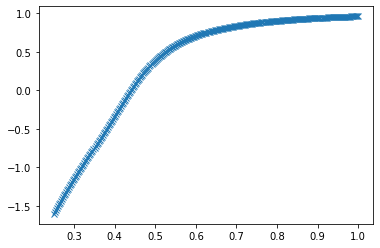

In [19]:
K = np.linspace(1/4, 1/1, 300)
n = 8
m = n
gamma = eval_gamma(n, K)
d_gamma = eval_d_gamma(n, K)

Z1 = eval_Z1(m,gamma,K)
Z2 = eval_Z2(m,gamma,K)
Z3 = eval_Z3(m,gamma,K)
Z4 = eval_Z4(m,gamma,K)

Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)

dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)

fig, ax = plt.subplots()
ax.plot(K, dZ1_over_Z1/(m*n), 'x', label='dZ1/Z1')
# ax.plot(K, np.gradient(Z1,K)/Z1)

# ax.plot(K, dZ2_over_Z2, 'x', label='dZ2/Z2')
# ax.plot(K, np.gradient(Z2,K)/Z2)

# ax.plot(K, dZ3_over_Z3, 'x', label='dZ3/Z3')
# ax.plot(K, np.gradient(Z3,K)/Z3)

# ax.plot(K, dZ4_over_Z4, 'x', label='dZ4/Z4')
# ax.plot(K, np.gradient(Z4,K)/Z4)

# ax.plot(K, dZ4_over_Z4*Z4_over_Z1, '+', label='dZ4/Z4')
# ax.plot(K, np.gradient(Z4,K)/Z1)
# ax.plot(K, eval_dZ4(m, gamma, d_gamma, K),'xk')
# ax.set_ylim([-200,200])

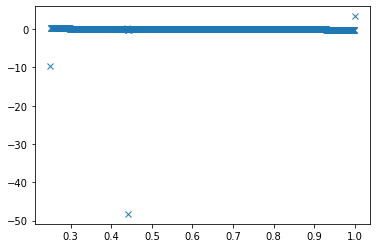

In [20]:
K = np.linspace(1/4, 1/1, 1000)
n = 10
m = 10
gamma = eval_gamma(n, K)
d_gamma = eval_d_gamma(n, K)

Z1 = eval_Z1(m,gamma,K)
Z2 = eval_Z2(m,gamma,K)
Z3 = eval_Z3(m,gamma,K)
Z4 = eval_Z4(m,gamma,K)

Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)

dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)

fig, ax = plt.subplots()


# ax.plot(K, dZ1_over_Z1-np.gradient(Z1,K)/Z1, 'x', label='dZ1/Z1')
# ax.plot(K, dZ2_over_Z2-np.gradient(Z2,K)/Z2, 'x', label='dZ2/Z2')
# ax.plot(K, dZ3_over_Z3-np.gradient(Z3,K)/Z3, 'x', label='dZ3/Z3')
ax.plot(K, dZ4_over_Z4-np.gradient(Z4,K)/Z4, 'x', label='dZ4/Z4')

### $Z^{\prime\prime}_1/Z_1$

In [21]:
def eval_ddZ1_over_Z1(m, gamma, d_gamma, dd_gamma, K):
    ddZ1_over_Z1 = (np.sum(d_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2)**2
    ddZ1_over_Z1 = ddZ1_over_Z1 + np.sum(
        dd_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2)+((d_gamma[1::2,:]/np.cosh(m*gamma[1::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ1_over_Z1

def eval_ddZ2_over_Z2(m, gamma, d_gamma, dd_gamma, K):
    ddZ2_over_Z2 = (np.sum(d_gamma[1::2,:]/np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2)**2
    ddZ2_over_Z2 = ddZ2_over_Z2 + np.sum(
        dd_gamma[1::2,:]/np.tanh(m*gamma[1::2,:]/2)-((d_gamma[1::2,:]/np.sinh(m*gamma[1::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ2_over_Z2

def eval_ddZ3_over_Z3(m, gamma, d_gamma, dd_gamma, K):
    ddZ3_over_Z3 = (np.sum(d_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2)**2
    ddZ3_over_Z3 = ddZ3_over_Z3 + np.sum(
        dd_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2)+((d_gamma[1::2,:]/np.cosh(m*gamma[0::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ3_over_Z3

def eval_ddZ4_over_Z4(m, gamma, d_gamma, dd_gamma, K):
    ddZ4_over_Z4 = (np.sum(d_gamma[0::2,:]/np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2)**2
    ddZ4_over_Z4 = ddZ4_over_Z4 + np.sum(
        dd_gamma[1::2,:]/np.tanh(m*gamma[0::2,:]/2)-((d_gamma[0::2,:]/np.sinh(m*gamma[0::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ4_over_Z4

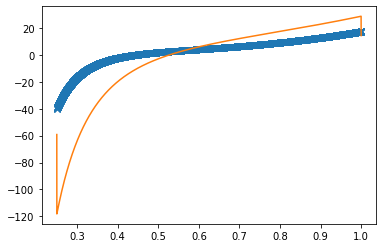

In [22]:
K = np.linspace(1/4, 1/1, 10000)
n = 1
m = 2
gamma = eval_gamma(n, K)
d_gamma = eval_d_gamma(n, K)
dd_gamma = eval_dd_gamma(n, K)

Z1 = eval_Z1(m,gamma,K)
Z2 = eval_Z2(m,gamma,K)
Z3 = eval_Z3(m,gamma,K)
Z4 = eval_Z4(m,gamma,K)

Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)

dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)

ddZ1_over_Z1 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
ddZ2_over_Z2 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
ddZ3_over_Z3 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
ddZ4_over_Z4 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)

fig, ax = plt.subplots()

# ax.plot(K, ddZ1_over_Z1, 'x', label='ddZ1/Z1')
# ax.plot(K, np.gradient(dZ1_over_Z1*Z1,K)/Z1)

# ax.plot(K, ddZ2_over_Z2, 'x', label='ddZ2/Z2')
# ax.plot(K, np.gradient(dZ2_over_Z2*Z2,K)/Z2)

# ax.plot(K, ddZ3_over_Z3, 'x', label='ddZ3/Z3')
# ax.plot(K, np.gradient(dZ3_over_Z3*Z3,K)/Z3)

ax.plot(K, ddZ4_over_Z4*Z4, 'x', label='ddZ3/Z3')
# ax.plot(K, np.gradient(dZ4_over_Z4*Z4,K))
ax.plot(K, np.gradient(np.gradient(Z4,K),K))

In [23]:
# ratio ddZ1/Z1, etc
def eval_ddZ1_over_Z1(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ1_over_Z1 = 0.0
    for r in range(n):
        ddZ1_over_Z1 = ddZ1_over_Z1 + d_gamma[2*r+1]*np.tanh(m*gamma[2*r+1]/2)
    ddZ1_over_Z1 = ddZ1_over_Z1 * m / 2
    ddZ1_over_Z1 = ddZ1_over_Z1**2
    
    for r in range(n):
        ddZ1_over_Z1 = ddZ1_over_Z1 + (dd_gamma[2*r+1]*np.tanh(m*gamma[2*r+1]/2) + ((d_gamma[2*r+1]/np.cosh(m*gamma[2*r+1]/2))**2) * m/2) * m/2
    return ddZ1_over_Z1

def eval_ddZ2_over_Z2(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ2_over_Z2 = 0.0
    for r in range(n):
        ddZ2_over_Z2 = ddZ2_over_Z2 + d_gamma[2*r+1]/np.tanh(m*gamma[2*r+1]/2)
        
    ddZ2_over_Z2 = ddZ2_over_Z2 * m / 2
    ddZ2_over_Z2 = ddZ2_over_Z2**2

    for r in range(n):
        ddZ2_over_Z2 = ddZ2_over_Z2 + (dd_gamma[2*r+1]/np.tanh(m*gamma[2*r+1]/2) - ((d_gamma[2*r+1]/np.sinh(m*gamma[2*r+1]/2))**2) * m/2) * m/2
    return ddZ2_over_Z2

def eval_ddZ3_over_Z3(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ3_over_Z3 = 0.0
    for r in range(n):
        ddZ3_over_Z3 = ddZ3_over_Z3 + d_gamma[2*r]*np.tanh(m*gamma[2*r]/2)
    ddZ3_over_Z3 = ddZ3_over_Z3 * m / 2
    ddZ3_over_Z3 = ddZ3_over_Z3**2
    
    for r in range(n):
        ddZ3_over_Z3 = ddZ3_over_Z3 + (dd_gamma[2*r]*np.tanh(m*gamma[2*r]/2) + ((d_gamma[2*r]/np.cosh(m*gamma[2*r]/2))**2) * m/2) * m/2        
    return ddZ3_over_Z3


def eval_ddZ4_over_Z4(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ4_over_Z4 = 0.0    
#     for r in range(n):
#         ddZ4_over_Z4 = ddZ4_over_Z4 + d_gamma[2*r]/np.tanh(m*gamma[2*r]/2)
#     ddZ4_over_Z4 = ddZ4_over_Z4 * m / 2
#     ddZ4_over_Z4 = ddZ4_over_Z4**2
    
    for r in range(n):
        ddZ4_over_Z4 = ddZ4_over_Z4 + (dd_gamma[2*r]/np.tanh(m*gamma[2*r]/2) - ((d_gamma[2*r+1]/np.sinh(m*gamma[2*r]/2))**2) * m/2) * m/2
    return ddZ4_over_Z4

### Partition function

In [7]:
# Z_nm: partition function and lnZ_nm: log of partition function
def Z_nm(K, n, m):
    gamma = eval_gamma(K, n)
    Z1 = eval_Z1(K, n, m, gamma)
    Z2 = eval_Z2(K, n, m, gamma)
    Z3 = eval_Z3(K, n, m, gamma)
    Z4 = eval_Z4(K, n, m, gamma)
    Z = 0.5 * (2*np.sinh(2*K))**(n*m/2) * (Z1+Z2+Z3+Z4)
    return Z

def lnZ_nm_bare(K, n, m):
    gamma = eval_gamma(K, n)
    Z1 = eval_Z1(K, n, m, gamma)
    Z2 = eval_Z2(K, n, m, gamma)
    Z3 = eval_Z3(K, n, m, gamma)
    Z4 = eval_Z4(K, n, m, gamma)
    lnZ = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + np.log(Z1+Z2+Z3+Z4)
    return lnZ  

# lnZ1
def eval_lnZ1(K, n, m, gamma):
    lnZ1 = 0.0
    for r in range(n):
        lnZ1 = lnZ1 + np.log(2*np.cosh(m*gamma[2*r+1]/2))
    return lnZ1

def lnZ_nm(K, n, m):
    gamma = eval_gamma(K, n)
    lnZ1 = eval_lnZ1(K, n, m, gamma)
#     Z2_over_Z1 = eval_Z2_over_Z1(K, n, m, gamma)
#     Z3_over_Z1 = eval_Z3_over_Z1(K, n, m, gamma)
#     Z4_over_Z1 = eval_Z4_over_Z1(K, n, m, gamma)    
#     lnZ = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + lnZ1 + np.log(1+Z2_over_Z1+Z3_over_Z1+Z4_over_Z1)
    lnZ = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + lnZ1 + np.log(All_Z_over_Z1(K, n, m, gamma))

    return lnZ  

In [8]:
T = np.linspace(2.2,2.3,1000)
K = 1/T
E_shape = {}

RG = 11
for i in range(1,RG):
    n = 2**i
    m = n

    gamma = eval_gamma(n, K)
    d_gamma = eval_d_gamma(n, K)
    dd_gamma = eval_dd_gamma(n, K)

    Z1 = eval_Z1(m,gamma,K)
    Z2 = eval_Z2(m,gamma,K)
    Z3 = eval_Z3(m,gamma,K)
    Z4 = eval_Z4(m,gamma,K)

    Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
    Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
    Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)

    dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
    dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
    dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
    dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)

    ddZ1_over_Z1 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
    ddZ2_over_Z2 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
    ddZ3_over_Z3 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
    ddZ4_over_Z4 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)

    sum_Z = 1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1
    sum_dZ = dZ1_over_Z1 + dZ2_over_Z2*Z2_over_Z1 + dZ3_over_Z3*Z3_over_Z1 + dZ4_over_Z4*Z4_over_Z1
    sum_ddZ = ddZ1_over_Z1 + ddZ2_over_Z2*Z2_over_Z1 + ddZ3_over_Z3*Z3_over_Z1 + ddZ4_over_Z4*Z4_over_Z1

    E_shape[(n,m)] = -J/np.tanh(2*K) - J*sum_dZ/sum_Z/(m*n)
    c = -2*(K**2)/(np.sinh(2*K)**2) + K**2*(sum_ddZ/sum_Z - (sum_dZ/sum_Z)**2)/(m*n)

fig, ax = plt.subplots(figsize=(10,8))
for i in range(1,RG):
    n = 2**i
    m = n
    ax.plot(T, np.gradient(E_shape[(n,m)],T))

ax.plot([Tc,Tc],[0,4],'k-')
# ax.set_xlim([1,4])
# ax.set_ylim([0.0,2.5])

NameError: name 'eval_Z1' is not defined

In [26]:
# energy_per_site
def e_nm(K, n, m):
    gamma = eval_gamma(K, n)
    e_nm = -J/np.tanh(2*K) 
    e_nm = e_nm - J*(All_dZ_over_Z1(K, n, m, gamma))/(n*m*All_Z_over_Z1(K, n, m, gamma))
    return e_nm

In [27]:
steps = 402
T = np.linspace(1, 4, steps)
K = 1/T

ln_Z_shape = {}
E_shape = {}
EE_shape = {}
c_shape = {}

for n in [2,4,8,16,32,64]:
    m = n
    ln_Z = np.zeros(steps)
    eng = np.zeros(steps)
    
    for i in range(steps):
        ln_Z[i] = lnZ_nm(K[i], n, m)
        eng[i] = e_nm(K[i], n, m)
        
    dlnZ_dK = np.gradient(ln_Z, K)
    ddlnZ_ddK = np.gradient(dlnZ_dK, K)
    
    E_shape[(n,m)] = -J*dlnZ_dK/(n*m)
    EE_shape[(n,m)] = eng

    c_shape[(n,m)] = ddlnZ_ddK*(K**2)/(n*m)

AttributeError: 'int' object has no attribute 'size'

KeyError: (2, 2)

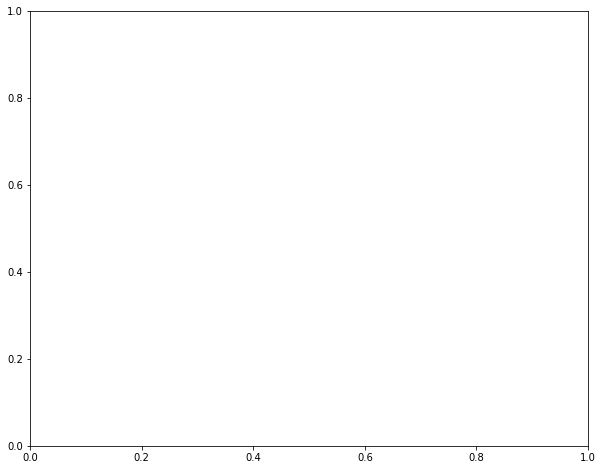

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
for n in [2,4,8,16,32,64]:
#     ax.plot(T, E_shape[(n,n)],'<')
#     ax.plot(T, EE_shape[(n,n)],'>')
    ax.plot(T[1:-1], E_shape[(n,n)][1:-1]-EE_shape[(n,n)][1:-1],'.')

ax.plot([Tc, Tc], [-1e-4, 1e-4], 'r-')

KeyError: (2, 2)

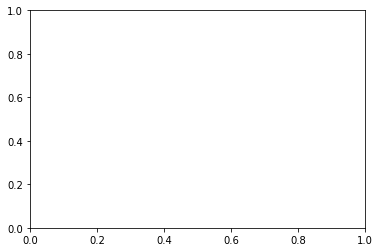

In [28]:
fig, ax = plt.subplots()
for n in [2,4,8,16,32,64]:
    ax.plot(T, c_shape[(n,n)])
ax.plot([Tc, Tc], [0, 3], 'r-')

In [29]:
K = 1/5
n = 128
m = n
gamma = eval_gamma(K, n)
# print(np.log(eval_Y1(K,n,m,gamma)))
# print(eval_Z1(K,n,m,gamma))
print(ln_Z_nxm_p(K, n, m))
print(lnZ_nm(K, n, m))

AttributeError: 'int' object has no attribute 'size'

In [ ]:
# lnZ_nm(1/5, 32, 32)
ln_Z_nxm_p(1/5, 32, 32)

In [ ]:
K = 1/5
n = 32
m = n 
gamma = eval_gamma(K, n)
print(eval_Z1(K, n, m, gamma),eval_Z2(K, n, m, gamma),eval_Z3(K, n, m, gamma),eval_Z4(K, n, m, gamma))
print(eval_Y1(K, n, m, gamma),eval_Y2(K, n, m, gamma),eval_Y3(K, n, m, gamma),eval_Y4(K, n, m, gamma))

print(Z_nxm(K,2,2))
print(Z_nm(K,2,2))

In [ ]:
Steps = 102
n = 128
m = 128
Z = np.zeros(Steps)
Z_new = np.zeros(Steps)
ln_Z = np.zeros(Steps)
ln_Z_new = np.zeros(Steps)
T = np.linspace(1, 5, Steps)
K = 1/T
for i in range(Steps):
#     print(i, K[i])
#     Z[i] = Z_nxm(K[i], n, m)
#     ln_Z[i] = np.log(Z[i])
    ln_Z[i] = ln_Z_nxm_p(K[i], n, m)
#     Z_new[i] = Z_nm(K[i], n, m)
    ln_Z_new[i] = lnZ_nm(K[i], n, m)

# print(np.log(Z))

dlnZ_dK = np.gradient(ln_Z, K)
dlnZ_dK_new = np.gradient(ln_Z_new, K)
# ddlnZ_ddK = np.gradient(dlnZ_dK, K)

fig, ax = plt.subplots()
ax.plot(T, -J*dlnZ_dK/(n*m), '.')
ax.plot(T, -J*dlnZ_dK_new/(n*m), 'X')
ax.plot([Tc, Tc], [-2, -0.4], 'r-')
# ax.set_xlim([1,4])

## First version

In [9]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))

In [10]:
def eval_gamma(K, n):
    gamma = np.zeros(2*n)
    gamma[0] = 2*K + np.log(np.tanh(K))
    for q in range(1, 2*n):
        gamma[q] = np.arccosh(np.cosh(2*K)**2/np.sinh(2*K)-np.cos(np.pi*q/n))
    return gamma

In [11]:
def eval_Y1(K, n, m, gamma):
    Y1 = 1.0
    for q in range(n):
        Y1 = Y1*2*np.cosh(m*gamma[2*q+1]/2)
    return Y1

def eval_Y2(K, n, m, gamma):
    Y2 = 1.0
    for q in range(n):
        Y2 = Y2*2*np.sinh(m*gamma[2*q+1]/2)
    return Y2

def eval_Y3(K, n, m, gamma):
    Y3 = 1.0
    for q in range(n):
        Y3 = Y3*2*np.cosh(m*gamma[2*q]/2)
    return Y3

def eval_Y4(K, n, m, gamma):
    Y4 = 1.0
    for q in range(n):
        Y4 = Y4*2*np.sinh(m*gamma[2*q]/2)
    return Y4

In [12]:
def eval_ln_Y1(K, n, m, gamma):
    ln_Y1 = 0.0
    for q in range(n):
        ln_Y1 = ln_Y1 + np.log(2*np.cosh(m*gamma[2*q+1]/2))
    return ln_Y1

def eval_Y2_Y1(K, n, m, gamma):
    Y2_Y1 = 1.0
    for q in range(n):
        Y2_Y1 = Y2_Y1 * np.sinh(m*gamma[2*q+1]/2) / np.cosh(m*gamma[2*q+1]/2)
    return Y2_Y1

def eval_Y3_Y1(K, n, m, gamma):
    Y3_Y1 = 1.0
    for q in range(n):
        Y3_Y1 = Y3_Y1 * np.cosh(m*gamma[2*q]/2) / np.cosh(m*gamma[2*q+1]/2)
    return Y3_Y1

def eval_Y4_Y1(K, n, m, gamma):
    Y4_Y1 = 1.0
    for q in range(n):
        Y4_Y1 = Y4_Y1 * np.sinh(m*gamma[2*q]/2) / np.cosh(m*gamma[2*q+1]/2)
    return Y4_Y1

In [13]:
def Z_nxm(K, n, m):
    gamma = eval_gamma(K, n)
    Y1 = eval_Y1(K, n, m, gamma)
    Y2 = eval_Y2(K, n, m, gamma)
    Y3 = eval_Y3(K, n, m, gamma)
    Y4 = eval_Y4(K, n, m, gamma)
    Z = 0.5*(2*np.sinh(2*K))**(n*m/2)*(Y1+Y2+Y3+Y4)
    return Z

def ln_Z_nxm(K, n, m):
    gamma = eval_gamma(K, n)
    Y1 = eval_Y1(K, n, m, gamma)
    Y2 = eval_Y2(K, n, m, gamma)
    Y3 = eval_Y3(K, n, m, gamma)
    Y4 = eval_Y4(K, n, m, gamma)
    ln_Z = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + np.log(Y1+Y2+Y3+Y4)
    return ln_Z

def ln_Z_nxm_p(K, n, m):
    gamma = eval_gamma(K, n)
    ln_Y1 = eval_ln_Y1(K, n, m, gamma)
    Y2_Y1 = eval_Y2_Y1(K, n, m, gamma)
    Y3_Y1 = eval_Y3_Y1(K, n, m, gamma)
    Y4_Y1 = eval_Y4_Y1(K, n, m, gamma)
    ln_Z = np.log(0.5) + (0.5*n*m)*np.log((2*np.sinh(2*K))) + ln_Y1 + np.log(1+Y2_Y1+Y3_Y1+Y4_Y1)
    return ln_Z

In [14]:
def exact_2x2(beta):
    Z = 2*np.exp(8*beta)+12+2*np.exp(-8*beta)
    F = -np.log(Z)/beta
    E = -(2*8*np.exp(8*beta)+2*(-8)*np.exp(-8*beta))/Z
    E_sqr = (2*64*np.exp(8*beta) +2*64*np.exp(-8*beta))/Z
    C = (E_sqr-E*E)*(beta*beta)
    M_abs = (2*4*np.exp(8*beta)+8*2)/Z
    M_sqr = (2*16*np.exp(8*beta)+8*4)/Z
    chi_p = (M_sqr-M_abs*M_abs)*beta
    
    return Z, F, E, E_sqr, C, M_abs, M_sqr, chi_p

In [15]:
print(np.log(Z_nxm(1, 2, 2)))
print(ln_Z_nxm(1,2,2))
print(ln_Z_nxm_p(1,2,2))
print(exact_2x2(1))

8.695158045717331
8.695158045717331
8.695158045717331
(5973.916645008712, -8.695158045717331, -7.98392834374676, 63.87144112554003, 0.12832932745715198, 3.9946429309943987, 15.973215104208428, 0.016042958064907964)


In [16]:
print(Z_nxm(1, 2, 2))
print(exact_2x2(1))

5973.916645008712
(5973.916645008712, -8.695158045717331, -7.98392834374676, 63.87144112554003, 0.12832932745715198, 3.9946429309943987, 15.973215104208428, 0.016042958064907964)


In [17]:
K =1
n = 2
gamma = eval_gamma(K, n)
print(eval_Y1(K, n, n, gamma))
print(eval_Y1(K, n, n, gamma))

60.920552991385286
60.920552991385286


In [18]:
steps = 102
T = np.linspace(1, 4, steps)
K = 1/T

ln_Z_shape = {}
E_shape = {}
c_shape = {}

for n in [2,4,8,16,32,64]:
    m = n
    ln_Z = np.zeros(steps)
    for i in range(steps):
        ln_Z[i] = ln_Z_nxm_p(K[i], n, m)
    dlnZ_dK = np.gradient(ln_Z, K)
    ddlnZ_ddK = np.gradient(dlnZ_dK, K)
    E_shape[(n,m)] = -J*dlnZ_dK/(n*m)
    c_shape[(n,m)] = ddlnZ_ddK*(K**2)/(n*m)

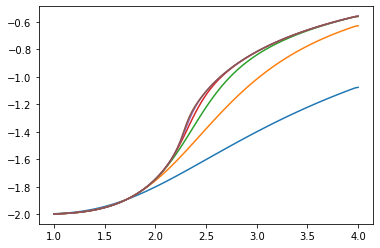

In [19]:
fig, ax = plt.subplots()
for n in [2,4,8,16,32,64]:
    ax.plot(T, E_shape[(n,n)])
# ax.plot([Tc, Tc], [-2, -0.4], 'r-')

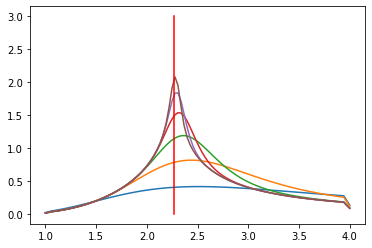

In [20]:
fig, ax = plt.subplots()
for n in [2,4,8,16,32,64]:
    ax.plot(T, c_shape[(n,n)])
ax.plot([Tc, Tc], [0, 3], 'r-')

In [24]:
Steps = 102
n = 16
m = 16
Z = np.zeros(Steps)
ln_Z = np.zeros(Steps)
T = np.linspace(1, 5, Steps)
K = 1/T
for i in range(Steps):
#     print(i, K[i])
    Z[i] = Z_nxm(K[i], n, m)
    ln_Z[i] = np.log(Z[i])
#     ln_Z[i] = ln_Z_nxm_p(K[i], n, m)
# print(np.log(Z))

dlnZ_dK = np.gradient(ln_Z, K)
ddlnZ_ddK = np.gradient(dlnZ_dK, K)

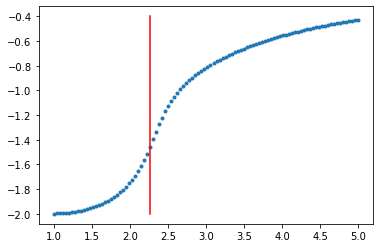

In [25]:
fig, ax = plt.subplots()
ax.plot(T, -J*dlnZ_dK/(n*m), '.')
ax.plot([Tc, Tc], [-2, -0.4], 'r-')
# ax.set_xlim([1,4])

(1, 4)

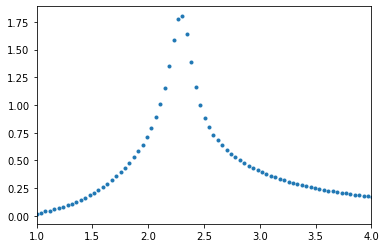

In [10]:
fig, ax = plt.subplots()
ax.plot(T, ddlnZ_ddK*(K**2)/(n*m), '.')
ax.set_xlim([1,4])

In [ ]:
Steps = 400
dlnZ_dK = {}
ddlnZ_ddK = {}

T = np.linspace(1, 4.1, Steps)
K = 1/T

for n in [2,4,8,16,32,64,128]:
    m = n
    ln_Z = np.zeros(Steps)
    for i in range(Steps):
        ln_Z[i] = ln_Z_nxm_p(K[i], n, m)

    dlnZ_dK[n] = np.gradient(ln_Z, K)
    ddlnZ_ddK[n] = np.gradient(dlnZ_dK[n], K)
    

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
for n in [2,4,8,16,32,64,128]:
    m = n
    ax.plot(T, ddlnZ_ddK[n]*K**2/(n*m), '.-', label='{}x{}'.format(n,m))

# ax.plot([Tc, Tc], [0,2.5],'r')
ax.set_xlim([1,4])
# ax.set_ylim([-0.1, 2.5])
ax.legend(fontsize=16)
fig.savefig('FSS.png')

In [ ]:
Z, F, E, E_sqr, C, M_abs, M_sqr, chi_p = exact_2x2(1)
print(Z)

In [ ]:
K = 1
n = 2
m = 2 
gamma = eval_gamma(K, n)
print(gamma)
Y1 = eval_Y1(K, n, m, gamma)
Y2 = eval_Y2(K, n, m, gamma)
Y3 = eval_Y3(K, n, m, gamma)
Y4 = eval_Y4(K, n, m, gamma)
print(Y1, Y2, Y3, Y4)

In [ ]:
gamma = eval_gamma(0.1, 100)

fig, ax = plt.subplots()
ax.plot(gamma, 'o')